In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

data1=pd.read_csv('/content/drive/MyDrive/280k_data/ack_h.csv')
data2=pd.read_csv('/content/drive/MyDrive/280k_data/benign_traffic_h.csv')
data3=pd.read_csv('/content/drive/MyDrive/280k_data/junk_h.csv')
data4=pd.read_csv('/content/drive/MyDrive/280k_data/scan_h.csv')
data5=pd.read_csv('/content/drive/MyDrive/280k_data/syn_h.csv')
data6=pd.read_csv('/content/drive/MyDrive/280k_data/tcp_h.csv')
data7=pd.read_csv('/content/drive/MyDrive/280k_data/udp_h.csv')
data8=pd.read_csv('/content/drive/MyDrive/280k_data/udpplain_h.csv')


data1['class']='ack'
data2['class']='benign'
data3['class']='junk'
data4['class']='scan'
data5['class']='syn'
data6['class']='tcp'
data7['class']='udp'
data8['class']='udpplain'


data=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8],

               axis=0, sort=False, ignore_index=True)

data.groupby('class')['class'].count()
data 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,class
0,1.000000,566.000000,0.000000e+00,1.000000,566.000000,0.000000e+00,1.000000,566.000000,0.000000e+00,1.000000,...,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
1,1.996585,566.000000,5.820000e-11,1.997950,566.000000,5.820000e-11,1.999316,566.000000,0.000000e+00,1.999932,...,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
2,2.958989,566.000000,0.000000e+00,2.975291,566.000000,5.820000e-11,2.991729,566.000000,5.820000e-11,2.999171,...,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
3,3.958979,566.000000,0.000000e+00,3.975285,566.000000,0.000000e+00,3.991727,566.000000,1.160000e-10,3.999171,...,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
4,4.914189,566.000000,1.160000e-10,4.948239,566.000000,5.820000e-11,4.982654,566.000000,5.820000e-11,4.998261,...,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279987,39.256165,504.003978,2.219839e+04,66.495961,426.545257,4.671683e+04,259.096457,328.198231,6.054598e+04,2788.201337,...,0.0,0.0,3132.118867,554.0,0.000037,554.0,1.400000e-09,0.0,0.0,udpplain
279988,40.255905,505.245933,2.170751e+04,67.495697,428.433595,4.626179e+04,260.096115,329.066378,6.050847e+04,2789.200968,...,0.0,0.0,3133.118826,554.0,0.000037,554.0,1.400000e-09,0.0,0.0,udpplain
279989,41.255606,506.427690,2.123756e+04,68.495396,430.266805,4.581322e+04,261.095728,329.927877,6.046976e+04,2790.200553,...,0.0,0.0,3134.118779,554.0,0.000037,554.0,1.400000e-09,0.0,0.0,udpplain
279990,42.255469,507.553516,2.078725e+04,69.495260,432.047260,4.537113e+04,262.095555,330.782802,6.042988e+04,2791.200369,...,0.0,0.0,3135.118758,554.0,0.000039,554.0,1.510000e-09,0.0,0.0,udpplain


In [ ]:
Labels = data['class']
data = data.drop(['class'], axis = 1)
Labels = np.array(Labels)
Labels

array(['ack', 'ack', 'ack', ..., 'udpplain', 'udpplain', 'udpplain'],
      dtype=object)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

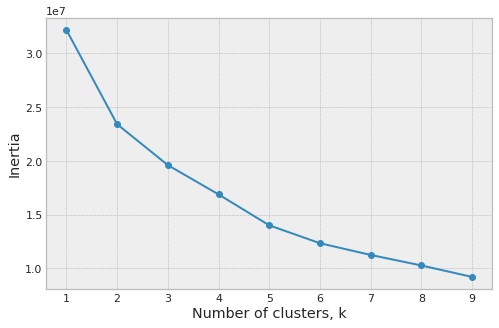

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_scaled)
    inertias.append(model.inertia_)

#plt.scatter()
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [ ]:
km = KMeans(n_clusters=8)
label = km.fit_predict(data_scaled)

In [ ]:
label

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
u_labels = np.unique(label)
u_labels

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [ ]:
cluster=km.labels_

In [ ]:
u_labels,counts = np.unique(km.labels_,return_counts=True)
print(dict(zip(u_labels,counts)))

{0: 147343, 1: 56867, 2: 40744, 3: 29462, 4: 4499, 5: 251, 6: 243, 7: 583}


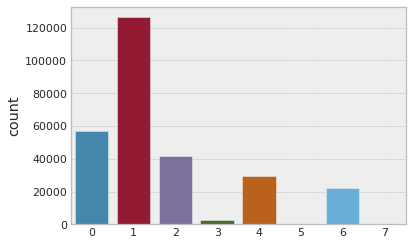

In [ ]:
sns.countplot(label)

In [ ]:
np.unique(Labels)

array(['ack', 'benign', 'junk', 'scan', 'syn', 'tcp', 'udp', 'udpplain'],
      dtype=object)

In [ ]:
np.unique(label)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [ ]:
label

array([2, 6, 6, ..., 2, 2, 2], dtype=int32)

In [ ]:
km.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(data_scaled, km.labels_) 

ValueError: ignored

**Silhoute Score**

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

score = silhouette_score(data_scaled, km.labels_, metric='euclidean')
score

0.5561428971260698

**Calinski-Harabaz Index**

In [ ]:
from sklearn import metrics
metrics.calinski_harabasz_score(data_scaled, km.labels_) 

88916.08111508493

In [ ]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(data_scaled, km.labels_)
print(db_index)

1.163209797732498


**Silhouette Visualizer**

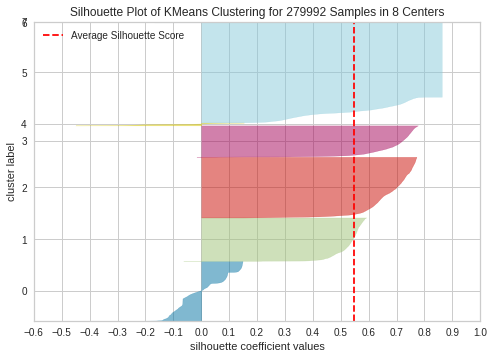

In [ ]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure